### Problem Statement

Misdiagnosis of the many diseases impacting agricultural crops can lead to misuse of chemicals leading to the emergence of resistant pathogen strains, increased input costs, and more outbreaks with significant economic loss and environmental impacts. Current disease diagnosis based on human scouting is time-consuming and expensive, and although computer-vision based models have the promise to increase efficiency, the great variance in symptoms due to age of infected tissues, genetic variations, and light conditions within trees decreases the accuracy of detection.

### Specific Objectives

Objectives of ‘Plant Pathology Challenge’ are to train a model using images of training dataset to 1) Accurately classify a given image from testing dataset into different diseased category or a healthy leaf; 2) Accurately distinguish between many diseases, sometimes more than one on a single leaf; 3) Deal with rare classes and novel symptoms; 4) Address depth perception—angle, light, shade, physiological age of the leaf; and 5) Incorporate expert knowledge in identification, annotation, quantification, and guiding computer vision to search for relevant features during learning.

#### Dataset Information:

- image_id: the foreign key

- combinations: one of the target labels

- healthy: one of the target labels

- rust: one of the target labels

- scab: one of the target labels

## Loading Data and required Libraries

In [1]:
import numpy as np
import pandas as pd
import os
from re import search
import shutil
import natsort
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2

In [2]:
!pip install natsort

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
dir_path = '/content/drive/MyDrive/plant-pathology-2020/images/'

In [6]:
print('Loading Training Data Labels from CSV file')
train = pd.read_csv('/content/drive/MyDrive/plant-pathology-2020/train.csv')
train.head(5)

Loading Training Data Labels from CSV file


,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


#### train.csv Labels Information:

- image_id: the foreign key

- combinations: one of the target labels

- healthy: one of the target labels

- rust: one of the target labels

- scab: one of the target labels

In [7]:
print('Loading Test Data Labels from CSV file')
test = pd.read_csv('/content/drive/MyDrive/plant-pathology-2020/test.csv')
test.head(5)

Loading Test Data Labels from CSV file


,image_id
0,Test_0
1,Test_1
2,Test_2
3,Test_3
4,Test_4


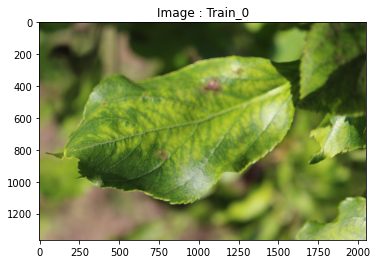

In [8]:
# Opening single Image 
image_open = Image.open('/content/drive/MyDrive/plant-pathology-2020/images/Train_0.jpg')
plt.imshow(image_open)
plt.title('Image : Train_0')
plt.show()

## Data Prepartion

 **Separating Test and Train data (Based on Labels) into different Folders**

**We have given input images in single folder.**
- ***For further model building process we need to separate this data into train and test folders.***
- ***Separate train data into 4 different folders based on label category.***

In [9]:
class_labels= train.columns[1:]
print(class_labels)

Index(['healthy', 'multiple_diseases', 'rust', 'scab'], dtype='object')


In [10]:
# Creating new Label column into train.csv
num = 0
train['label'] =0
for i in class_labels:
    train['label'] = train['label'] + train[i]*num
    num +=1
train.head(5)

,image_id,healthy,multiple_diseases,rust,scab,label
0,Train_0,0,0,0,1,3
1,Train_1,0,1,0,0,1
2,Train_2,1,0,0,0,0
3,Train_3,0,0,1,0,2
4,Train_4,1,0,0,0,0


In [11]:
# Creating Function to fetch label of individual train image
import re
def get_label(img):
    if re.search('Train',img):
        img = img.split('.')[0] # Fecth image_id from image name
        # return label corresponding to image_id
        label = train.loc[train['image_id'] == img]["label"]
        return label
    elif re.search('Test',img):
        pass

In [14]:
path__dir =r'/content/drive/MyDrive/plant-pathology-2020'

In [21]:
# Creating New folders to separate data
shutil.os.mkdir(path__dir+ r'/train')
shutil.os.mkdir(path__dir+ r'/train/healthy')
shutil.os.mkdir(path__dir+ r'/train/multiple_diseases')
shutil.os.mkdir(path__dir+ r'/train/rust')
shutil.os.mkdir(path__dir+ r'/train/scab')
shutil.os.mkdir(path__dir+ r'/test')

In [22]:
img ='Test_112.jpg'
img.split("_")[1].split(".")[0]

'112'

In [23]:
# Creating fuction to copy images from original directory to respective folders based on labels
def copy_image_to_its_folder():
    images = natsort.natsorted(os.listdir(dir_path))  # Sorting image in proper form
    for img in tqdm(images):
        label = get_label(img) # getting label of image
        path = os.path.join(dir_path,img) # Original path of image
        
        if search('Train',img): # Searching pattern 'Train' in Image name 
            #label = get_label(img)
            if (img.split("_")[1].split(".")[0]) and label.item() == 0:
                shutil.copy(path,path__dir+ r'/train/healthy' )
            elif (img.split("_")[1].split(".")[0]) and label.item() == 1:
                shutil.copy(path,path__dir+ r'/train/multiple_diseases' )
            elif (img.split("_")[1].split(".")[0]) and label.item() == 2:
                shutil.copy(path,path__dir+ r'/train/rust' )
            elif (img.split("_")[1].split(".")[0]) and label.item() == 3:
                shutil.copy(path,path__dir+ r'/train/scab' )
        elif search('Test',img):
            shutil.copy(path,path__dir+ r'/test')

In [24]:
data_dir=copy_image_to_its_folder()

100%|██████████| 3648/3648 [03:15<00:00, 18.65it/s]


## Image Preprocessing
1. Resizing Image
2. Rescaling Image
3. Image Augmentation

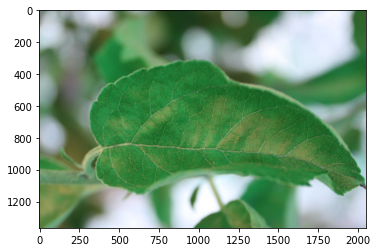

In [25]:
Train_dir = '/content/drive/MyDrive/plant-pathology-2020/train/'
Categories = ['healthy','multiple_diseases','rust','scab']
for i in Categories:
    path = os.path.join(Train_dir,i)
    for img in os.listdir(path):
        old_image = cv2.imread(os.path.join(path,img),cv2.COLOR_BGR2RGB)
        new_image=cv2.resize(old_image,(256,256))
        plt.imshow(old_image)
        plt.show()
        break
    break

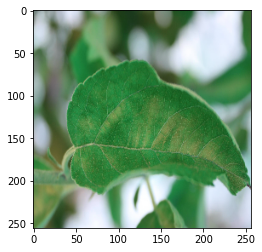

In [26]:
new_image=cv2.resize(old_image,(256,256))
plt.imshow(new_image)
plt.show()

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [28]:
datagen = ImageDataGenerator(rescale = 1/255,
                            shear_range = 0.2,
                            zoom_range = 0.2,
                            horizontal_flip = True,
                            vertical_flip = True,
                            validation_split = 0.2)

train_datagen = datagen.flow_from_directory(Train_dir,
                                target_size = (256,256),
                                batch_size =16,
                                class_mode = 'categorical',
                                subset = 'training')
val_datagen = datagen.flow_from_directory(Train_dir,
                                         target_size = (256,256),
                                    batch_size =16,
                                    class_mode = 'categorical',
                                    subset = 'validation')

Found 1458 images belonging to 4 classes.
Found 363 images belonging to 4 classes.


## CNN Model Building

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Dense,Activation,Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dropout,BatchNormalization

In [32]:
model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu',padding='same',input_shape=(256,256,3)))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 64)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 64)     256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 128, 128, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)      

In [34]:
model.compile(optimizer = 'adam', loss='categorical_crossentropy', 
              metrics=['accuracy'])

checkpoint=ModelCheckpoint(r'apple_tree_diseases.h5',
                          monitor='val_loss',
                          mode='min',
                          save_best_only=True,
                          verbose=1)
earlystop=EarlyStopping(monitor='val_loss',
                       min_delta=0.001,
                       patience=10,
                       verbose=1,
                       restore_best_weights=True)

callbacks=[checkpoint,earlystop]

In [35]:
model_history = model.fit(train_datagen, validation_data=val_datagen,
                          epochs = 30,
                          callbacks =callbacks)

Epoch 1/30
47/92 [==============>...............] - ETA: 3:25 - loss: 1.4757 - accuracy: 0.4069

KeyboardInterrupt: ignored

### Plotting Training vs Validation Accuracy

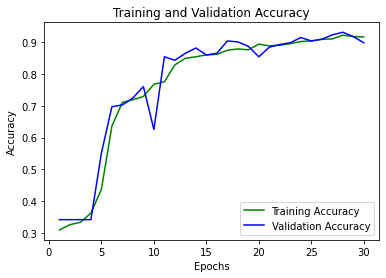

In [ ]:
train_acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
epoachs = range(1,31)
plt.plot(epoachs,train_acc,'g',label='Training Accuracy')
plt.plot(epoachs,val_acc,'b',label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

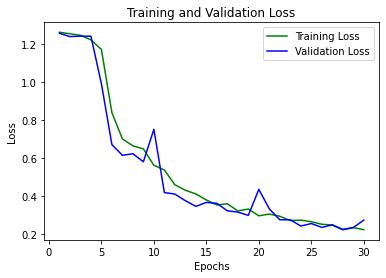

In [ ]:
loss_train=model_history.history['loss']
loss_val=model_history.history['val_loss']
epochs=range(1,31)
plt.plot(epochs,loss_train,'g',label='Training Loss')
plt.plot(epochs,loss_val,'b',label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
model.save('Apple_Tree_Disease.h5')

### Prediction on a Test Image

1/1 [==============================] - 2s 2s/step
3


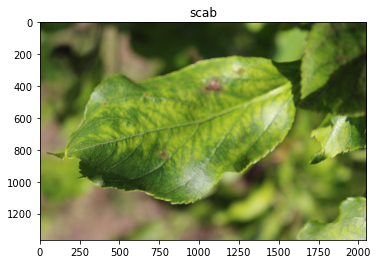

In [ ]:
test_image=r'/content/drive/MyDrive/plant-pathology-2020/images/Test_1153.jpg/'
image_result=Image.open(test_image)

from tensorflow.keras.preprocessing import image
test_image=image.load_img(test_image,target_size=(256,256))
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
print(np.argmax(result))
Categories=['healthy','multiple_disease','rust','scab']
image_result=plt.imshow(image_result)
plt.title(Categories[np.argmax(result)])
plt.show()

#### References :
- https://www.kaggle.com/competitions/plant-pathology-2020-fgvc7/overview
- https://bsapubs.onlinelibrary.wiley.com/doi/10.1002/aps3.11390

In [44]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121, DenseNet169, DenseNet201, EfficientNetB7 

In [42]:
from IPython.display import SVG
!pip install efficientnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 2.8 MB/s 


In [46]:
import efficientnet.tfkeras as efn

In [51]:
from keras.layers import Conv2D, MaxPooling2D

model_efficientnet_b7 = tf.keras.Sequential([
        efn.EfficientNetB7(
            input_shape=(256, 256, 3),
            weights='imagenet',
            include_top=False
        ),
        MaxPooling2D(pool_size=(2,2)),
        Flatten(),
        BatchNormalization(),
        Dropout(0.3),
        Dense(4, activation='softmax')
    ])
        
# model_efficientnet_b7.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.AUC(name='AUC')])

In [52]:
model_efficientnet_b7.compile(optimizer = 'adam', loss='categorical_crossentropy', 
              metrics=['accuracy'])

checkpoint=ModelCheckpoint(r'apple_tree_diseases.h5',
                          monitor='val_loss',
                          mode='min',
                          save_best_only=True,
                          verbose=1)
earlystop=EarlyStopping(monitor='val_loss',
                       min_delta=0.001,
                       patience=10,
                       verbose=1,
                       restore_best_weights=True)

callbacks=[checkpoint,earlystop]

In [ ]:
model_history = model.fit(train_datagen, validation_data=val_datagen,
                          epochs = 30,
                          callbacks =callbacks)

Epoch 1/30
29/92 [========>.....................] - ETA: 4:40 - loss: 1.3802 - accuracy: 0.4178